# Loan Approval Prediction

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

## Dataset

In [34]:
df = pd.read_csv('../data/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [36]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [37]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

no null values found.

In [38]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

columns need to be stripped.

In [39]:
df.columns = df.columns.str.strip()

In [40]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [42]:
df['total_assets'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']
df.drop(columns=['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], inplace=True)

## Data Visualization

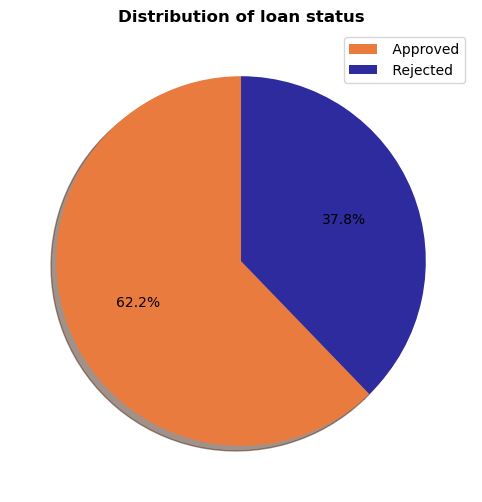

In [44]:
plt.figure(figsize=(8,6))
plt.pie(df["loan_status"].value_counts(),shadow=True,autopct="%1.1f%%",colors=["#EA7B3FFF", "#2D2B9D"],startangle=90)
plt.legend(df["loan_status"],loc="upper right")
plt.title("Distribution of loan status",weight="bold")
plt.show()

imbalanced data, need resambling.

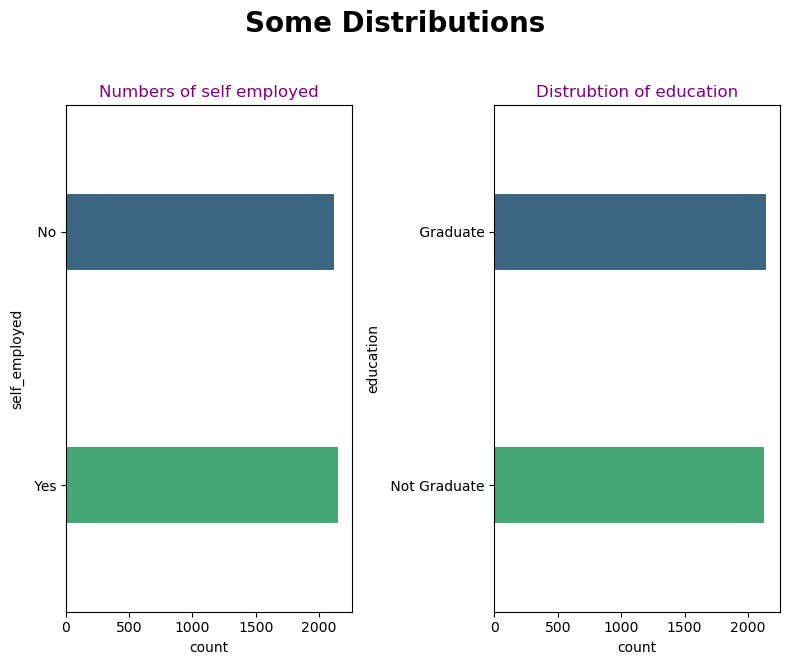

In [45]:
fig,ax=plt.subplots(1,2,figsize=(8,6))
sns.countplot(y=df["self_employed"],width=0.3,palette="viridis",ax=ax[0])
ax[0].set_title("Numbers of self employed",loc="center",color="purple")

sns.countplot(y=df["education"],width=0.3,palette="viridis",ax=ax[1])
ax[1].set_title("Distrubtion of education",color="purple")

plt.tight_layout()
plt.suptitle("Some Distributions",weight="bold",size=20,y=1.1)
plt.show()

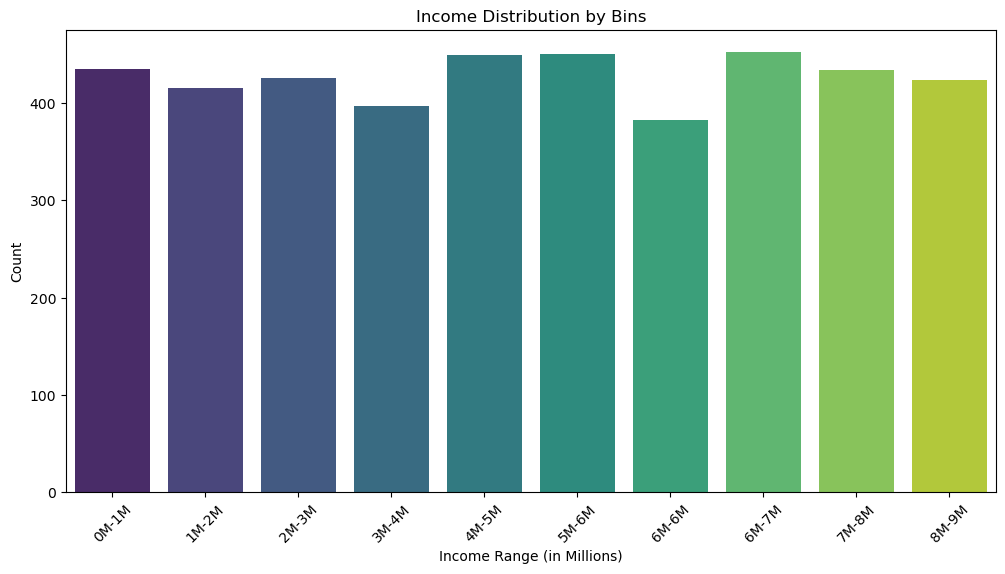

In [46]:
income_bar = pd.cut(df["income_annum"],bins=10)
income_counts = income_bar.value_counts().sort_index()
labels = [f"{int(interval.left/1e6)}M-{int(interval.right/1e6)}M" for interval in income_counts.index]
plt.figure(figsize=(12,6))
sns.barplot(x=labels, y=income_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Income Range (in Millions)")
plt.ylabel("Count")
plt.title("Income Distribution by Bins")
plt.show()

<Axes: xlabel='income_annum', ylabel='loan_amount'>

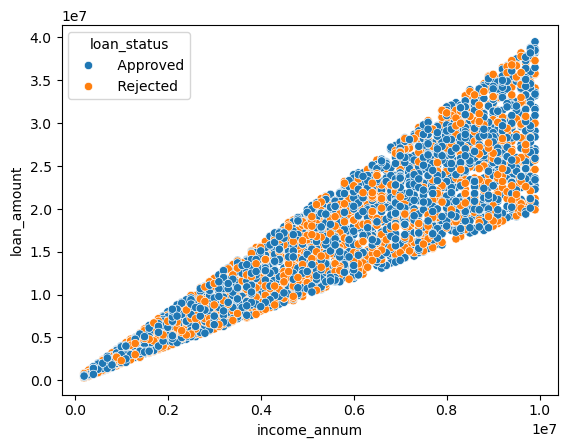

In [47]:
sns.scatterplot(x="income_annum", y="loan_amount", hue="loan_status", data=df)

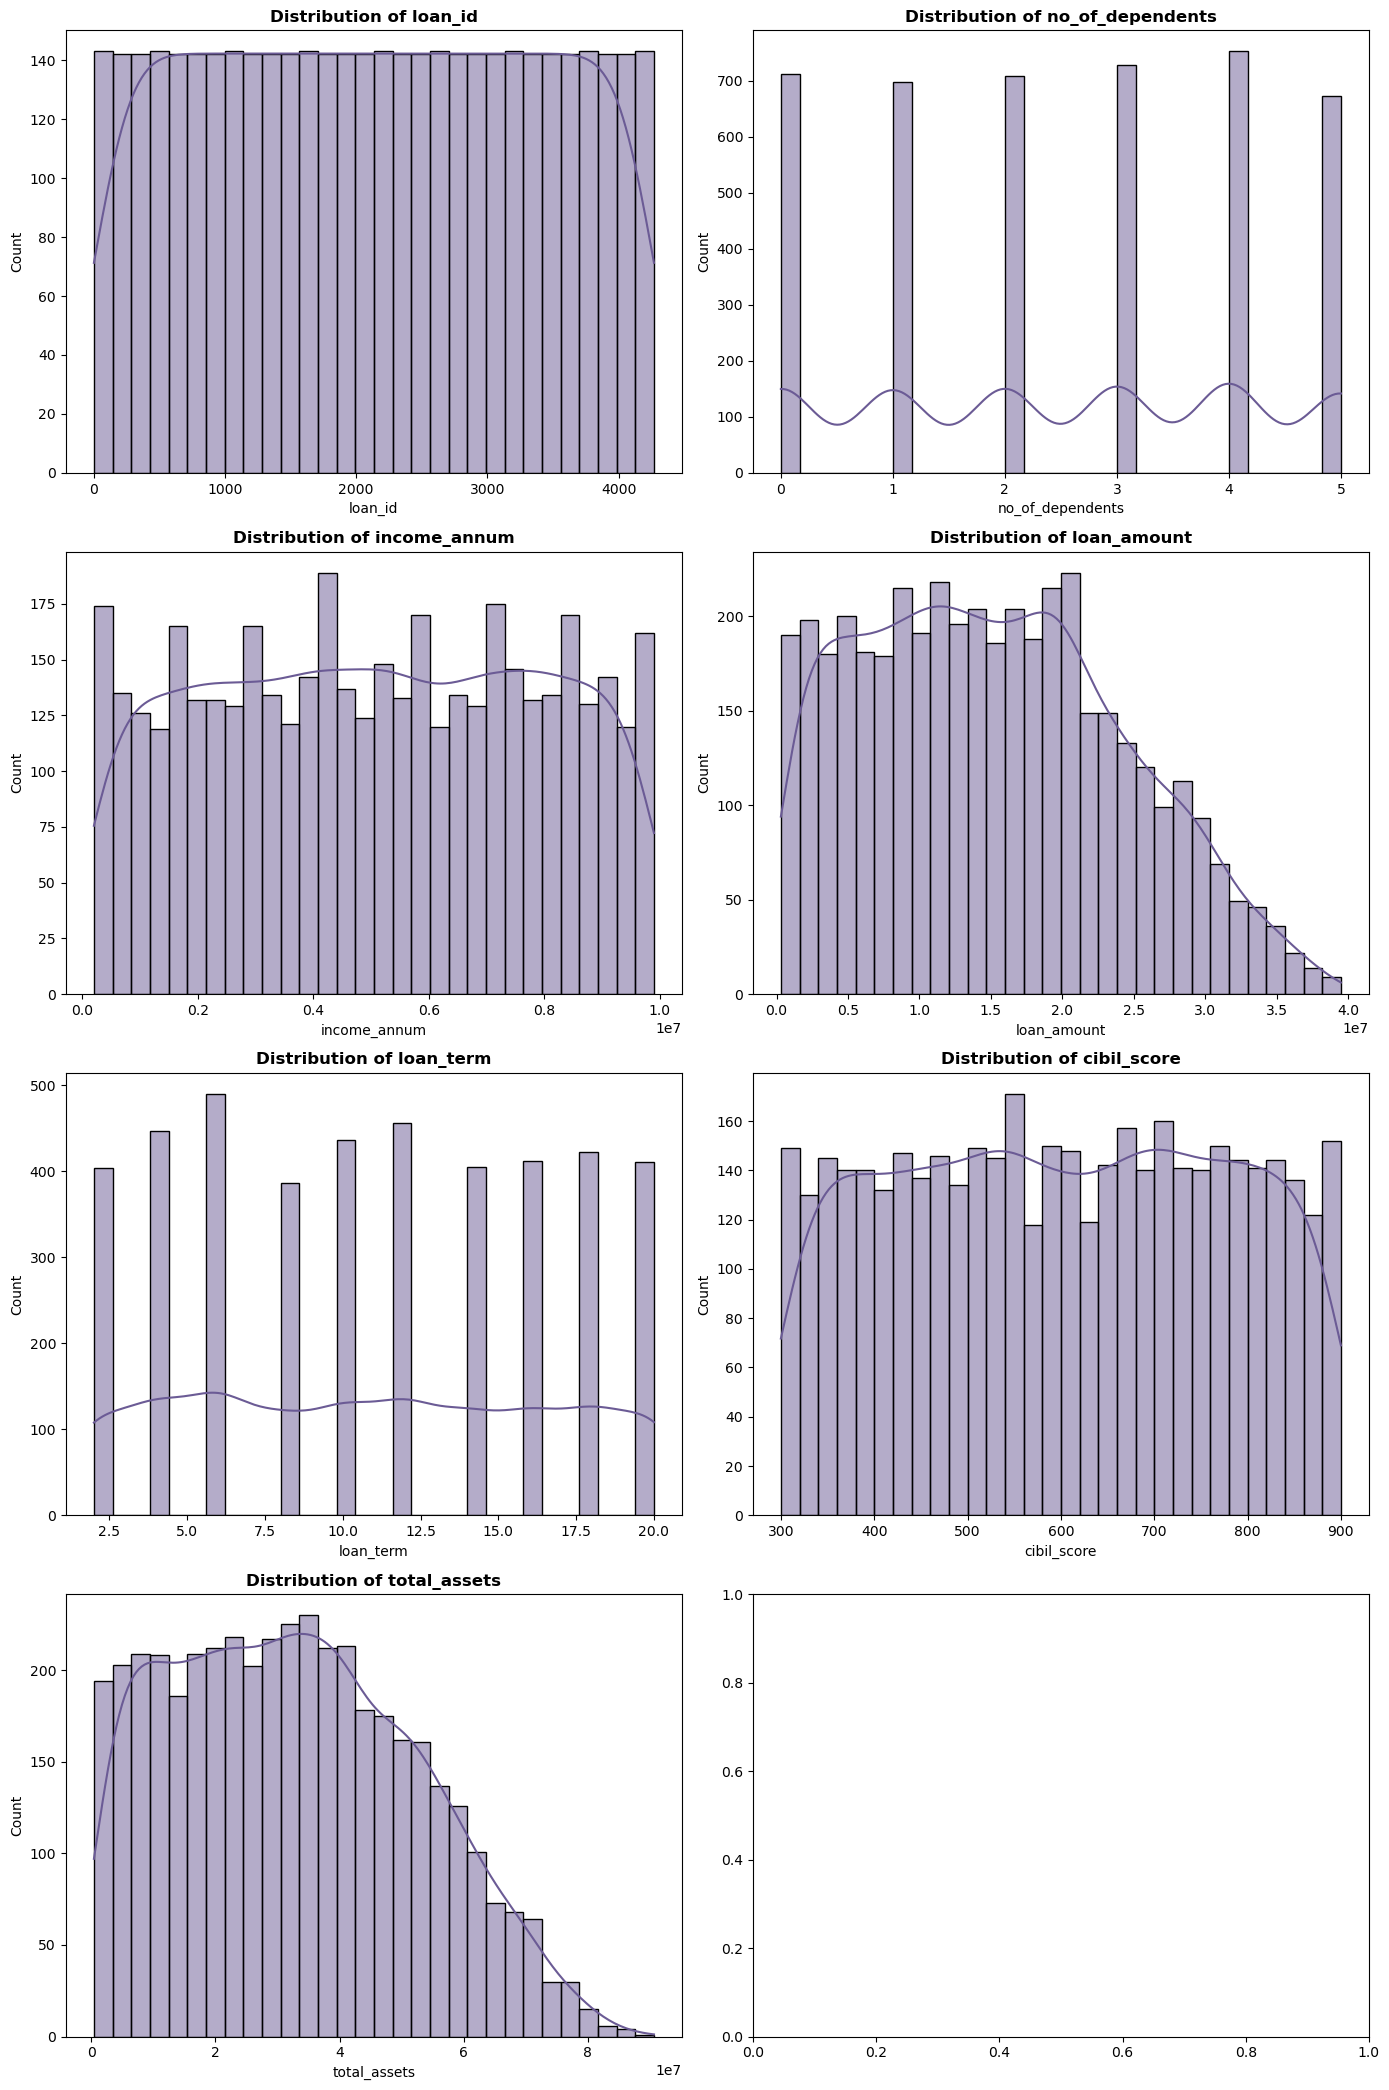

In [48]:
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

fig, axes = plt.subplots(len(numeric_cols)//2 + len(numeric_cols)%2, 2, figsize=(14, len(numeric_cols)*3))
axes = axes.flatten() 

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color="#6B5B95", ax=axes[i], bins=30)
    axes[i].set_title(f"Distribution of {col}", weight="bold")

plt.tight_layout()
plt.show()

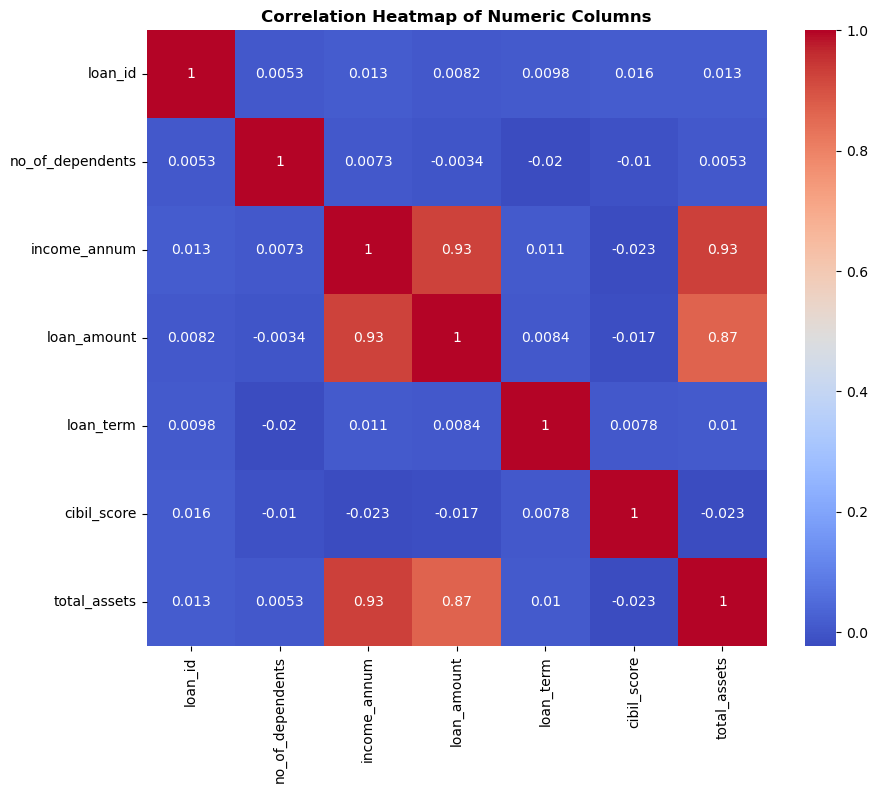

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Columns", weight="bold")
plt.show()

## Oversampling

In [50]:
oversampled_df = df.copy()

In [51]:
oversampled_df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [52]:
max_class_size = oversampled_df['loan_status'].value_counts().max()

In [53]:
# oversampling the minor class
oversampled_df = oversampled_df.groupby('loan_status').apply(lambda x: x.sample(max_class_size, replace=True, random_state=42)).reset_index(drop=True)

oversampled_df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    2656
Name: count, dtype: int64

In [54]:
oversampled_X = oversampled_df.drop(columns=['loan_status']).copy()
oversampled_y = oversampled_df['loan_status'].copy()

## Model Training

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# select relevant features
oversampled_X = oversampled_X[['no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'total_assets']]
# encode categorical variables
le = LabelEncoder()
for col in oversampled_X.select_dtypes(include=['object']).columns:
    oversampled_X[col] = le.fit_transform(oversampled_X[col])

In [58]:
# encode target variable
oversampled_y = le.fit_transform(oversampled_y)

In [59]:
# scale numerical features
scaler = StandardScaler()
num_cols = oversampled_X.select_dtypes(include=['int64', 'float64']).columns
oversampled_X[num_cols] = scaler.fit_transform(oversampled_X[num_cols])

In [60]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(oversampled_X, oversampled_y, test_size=0.2, random_state=42)

In [61]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       543
           1       0.92      0.94      0.93       520

    accuracy                           0.93      1063
   macro avg       0.93      0.93      0.93      1063
weighted avg       0.93      0.93      0.93      1063



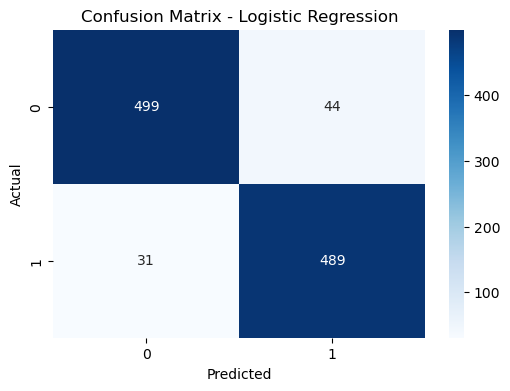

In [62]:
# confusion matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [63]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       543
           1       0.98      0.99      0.99       520

    accuracy                           0.99      1063
   macro avg       0.99      0.99      0.99      1063
weighted avg       0.99      0.99      0.99      1063



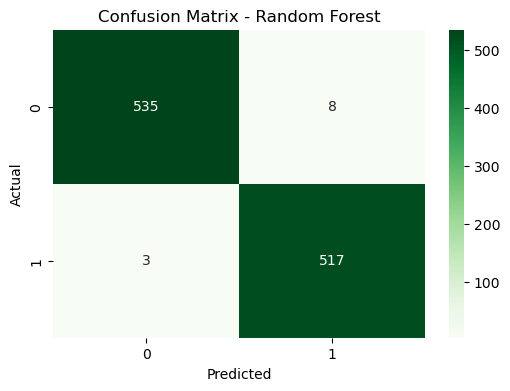

In [64]:
# confusion matrix for random forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

chose Random forest because it has a way better accuracy.